# Cereals EDA

The data is from Kaggle [Cereals Dataset](https://www.kaggle.com/crawford/80-cereals). Here we perform EDA of 77 different cereals.

The various columns in the dataset are as follows:

- Name: Name of cereal
- mfr: Manufacturer of cereal
    - A = American Home Food Products
    - G = General Mills
    - K = Kelloggs
    - N = Nabisco
    - P = Post
    - Q = Quaker Oats
    - R = Ralston Purina
- type: cold/hot
- calories: calories per serving
- protein: grams of protein
- fat: grams of fat
- sodium: milligrams of sodium
- fiber: grams of dietary fiber
- carbo: grams of complex carbohydrates
- sugars: grams of sugars
- potass: milligrams of potassium
- vitamins: vitamins and minerals - 0, 25, or 100, indicating the typical percentage of FDA recommended
- shelf: display shelf (1, 2, or 3, counting from the floor)
- weight: weight in ounces of one serving
- cups: number of cups in one serving
- rating: a rating of the cereals (Possibly from Consumer Reports?)

## Imports

In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## The Data

In [83]:
cereals_df = pd.read_csv('cereal.csv')

In [84]:
cereals_df.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


In [85]:
cereals_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      77 non-null     object 
 1   mfr       77 non-null     object 
 2   type      77 non-null     object 
 3   calories  77 non-null     int64  
 4   protein   77 non-null     int64  
 5   fat       77 non-null     int64  
 6   sodium    77 non-null     int64  
 7   fiber     77 non-null     float64
 8   carbo     77 non-null     float64
 9   sugars    77 non-null     int64  
 10  potass    77 non-null     int64  
 11  vitamins  77 non-null     int64  
 12  shelf     77 non-null     int64  
 13  weight    77 non-null     float64
 14  cups      77 non-null     float64
 15  rating    77 non-null     float64
dtypes: float64(5), int64(8), object(3)
memory usage: 9.8+ KB


In [86]:
cereals_df.describe()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,106.883117,2.545455,1.012987,159.675325,2.151948,14.597403,6.922078,96.077922,28.246753,2.207792,1.029610,0.821039,42.665705
std,19.484119,1.094790,1.006473,83.832295,2.383364,4.278956,4.444885,71.286813,22.342523,0.832524,0.150477,0.232716,14.047289
min,50.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,1.000000,0.500000,0.250000,18.042851
25%,100.000000,2.000000,0.000000,130.000000,1.000000,12.000000,3.000000,40.000000,25.000000,1.000000,1.000000,0.670000,33.174094
50%,110.000000,3.000000,1.000000,180.000000,2.000000,14.000000,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.400208
75%,110.000000,3.000000,2.000000,210.000000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,50.828392
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,3.000000,1.500000,1.500000,93.704912


## EDA

In [87]:
# check for null values
cereals_df.isnull().sum()

name        0
mfr         0
type        0
calories    0
protein     0
fat         0
sodium      0
fiber       0
carbo       0
sugars      0
potass      0
vitamins    0
shelf       0
weight      0
cups        0
rating      0
dtype: int64

In [88]:
# number of unique values in each of the columns
cereals_df.nunique()

name        77
mfr          7
type         2
calories    11
protein      6
fat          5
sodium      27
fiber       13
carbo       22
sugars      17
potass      36
vitamins     3
shelf        3
weight       7
cups        12
rating      77
dtype: int64

In [89]:
# unique values in mfr column
cereals_df['mfr'].unique()

array(['N', 'Q', 'K', 'R', 'G', 'P', 'A'], dtype=object)

Let us first look into the mfr column and see which manufacturer has many cereal varieties.

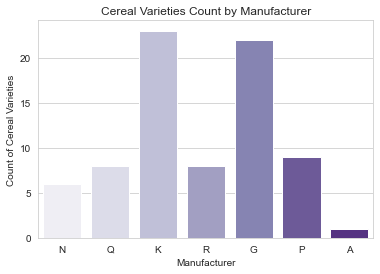

In [90]:
sns.set_style('whitegrid')
sns.countplot(data = cereals_df,
             x = 'mfr',
             palette = 'Purples')
plt.xlabel('Manufacturer')
plt.ylabel('Count of Cereal Varieties')
plt.title('Cereal Varieties Count by Manufacturer')
plt.show()

From the plot above it is clear that K (Kelloggs) and G (General Mills) have the highest varieties of cereals.

Next we analyse the type column.

In [91]:
cereals_df['type'].unique()

array(['C', 'H'], dtype=object)

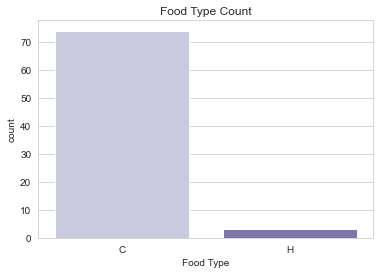

In [92]:
sns.countplot(data = cereals_df,
             x = 'type',
             palette = 'Purples')
plt.title('Food Type Count')
plt.xlabel('Food Type')
plt.show()

C (Cold) cereals seem more common than H (Hot) cereals.

We next look into the calories.

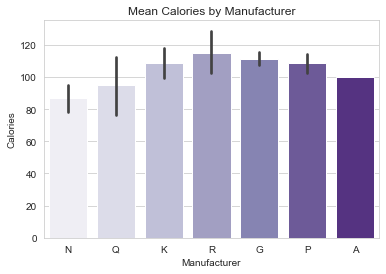

In [93]:
sns.barplot(data = cereals_df,
            x = 'mfr',
            y = 'calories',
            palette = 'Purples')
plt.xlabel('Manufacturer')
plt.ylabel('Calories')
plt.title('Mean Calories by Manufacturer')
plt.show()

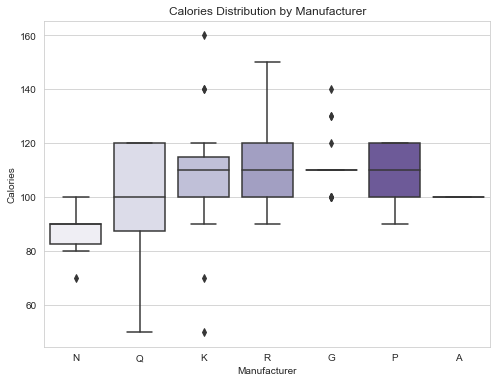

In [94]:
plt.figure(figsize=(8,6))
sns.boxplot(data = cereals_df,
            x = 'mfr',
            y = 'calories',
            palette = 'Purples')
plt.xlabel('Manufacturer')
plt.ylabel('Calories')
plt.title('Calories Distribution by Manufacturer')
plt.show()

The Ralston Purina (R) manufacturer has products with highest mean calories, with the median calories for Kelloggs (K), Ralston Purina (R), General Mills (G) and Post (P) being around the same.

Cereals by Nabisco (N) have the least mean and median calories, followed by Quaker Oats (Q).

Next we look into the top 10 cereals with the highest calorie count.

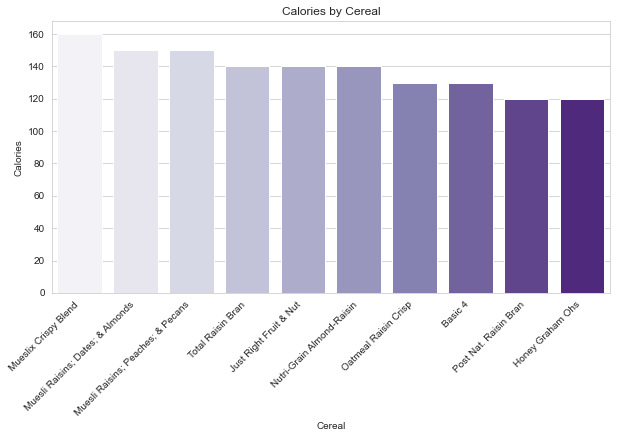

In [95]:
plt.figure(figsize = (10,5))
sns.barplot(data = cereals_df.sort_values(by = 'calories', ascending = False).head(10), 
            x = 'name', 
            y = 'calories',
            palette = 'Purples')

plt.xticks(rotation = 45,
           horizontalalignment='right')
plt.xlabel('Cereal')
plt.ylabel('Calories')
plt.title('Calories by Cereal')
plt.show()

Now let us look at the manufacturer of the top 10 cereals with highest calorie count.

In [96]:
cereals_df.sort_values(by = 'calories', ascending = False).head(10)[['name','mfr','calories']]

,name,mfr,calories
46,Mueslix Crispy Blend,K,160
44,Muesli Raisins; Dates; & Almonds,R,150
45,Muesli Raisins; Peaches; & Pecans,R,150
70,Total Raisin Bran,G,140
39,Just Right Fruit & Nut,K,140
49,Nutri-Grain Almond-Raisin,K,140
51,Oatmeal Raisin Crisp,G,130
7,Basic 4,G,130
52,Post Nat. Raisin Bran,P,120
35,Honey Graham Ohs,Q,120


We can see that the Kelloggs (K), General Mills (G) are the manufacturers with 3 products with high calories.

Next we look into the protein in the cereals.

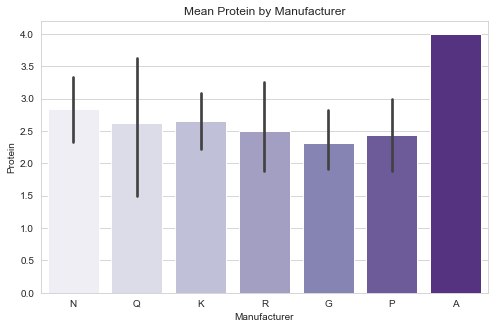

In [97]:
plt.figure(figsize = (8,5))
sns.barplot(data = cereals_df,
            x = 'mfr',
            y = 'protein',
            palette = 'Purples')

plt.xlabel('Manufacturer')
plt.ylabel('Protein')
plt.title('Mean Protein by Manufacturer')
plt.show()

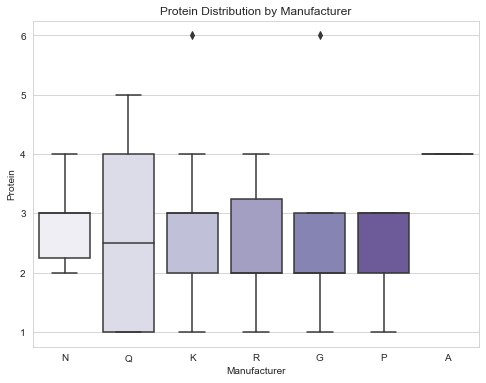

In [98]:
plt.figure(figsize = (8,6))
sns.boxplot(data = cereals_df,
            x = 'mfr',
            y = 'protein',
            palette = 'Purples')
plt.xlabel('Manufacturer')
plt.ylabel('Protein')
plt.title('Protein Distribution by Manufacturer')
plt.show()

The mean and median protein is the highest for the cereals with American Home Food Products (A).

Let us see what are the cereals with the highest protein content.

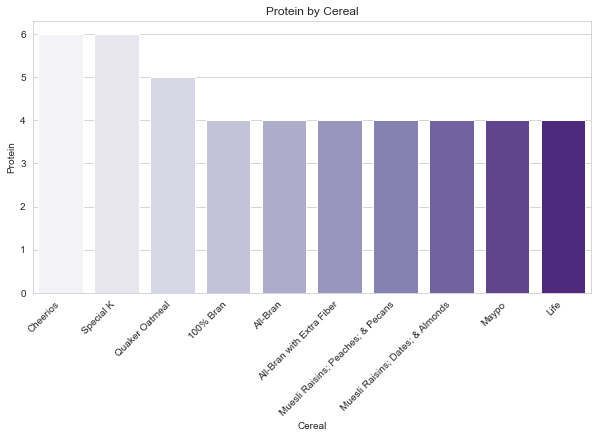

In [99]:
plt.figure(figsize = (10,5))
sns.barplot(data = cereals_df.sort_values(by = 'protein', ascending = False).head(10), 
            x = 'name', 
            y = 'protein',
            palette = 'Purples')

plt.xticks(rotation = 45,
           horizontalalignment='right')
plt.xlabel('Cereal')
plt.ylabel('Protein')
plt.title('Protein by Cereal')
plt.show()

Both Cheerios and Special K have the highest amount of protein.

Next we look into the fat content in the cereals. Healthy cereals have low saturated fats.

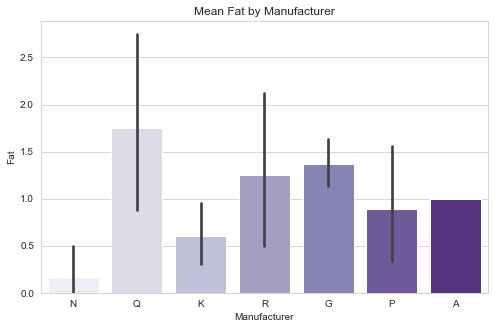

In [100]:
plt.figure(figsize = (8,5))
sns.barplot(data = cereals_df,
            x = 'mfr',
            y = 'fat',
            palette = 'Purples')

plt.xlabel('Manufacturer')
plt.ylabel('Fat')
plt.title('Mean Fat by Manufacturer')
plt.show()

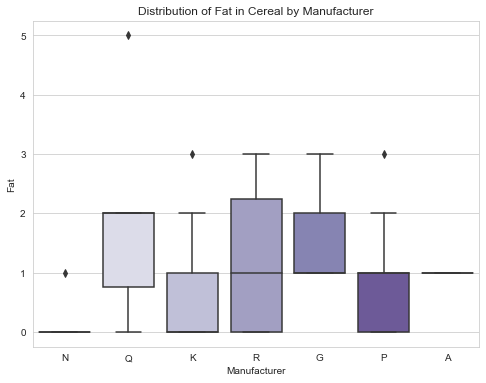

In [101]:
plt.figure(figsize = (8,6))
sns.boxplot(data = cereals_df,
            x = 'mfr',
            y = 'fat',
            palette = 'Purples')
plt.xlabel('Manufacturer')
plt.ylabel('Fat')
plt.title('Distribution of Fat in Cereal by Manufacturer')
plt.show()

In [102]:
cereals_df.groupby('mfr')['fat'].median()

mfr
A    1
G    1
K    0
N    0
P    1
Q    2
R    1
Name: fat, dtype: int64

Quaker Oats (Q) manufacture products with the highest mean and median fat content.

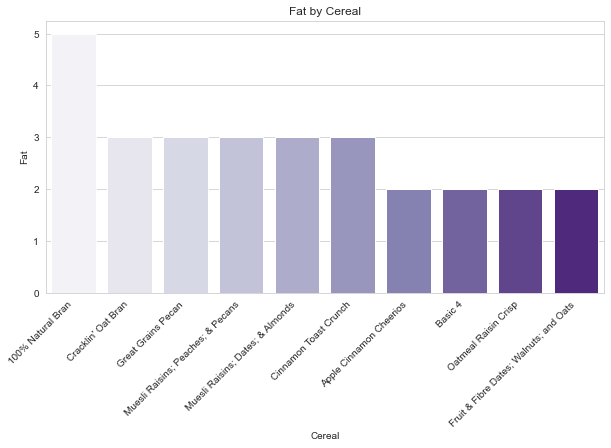

In [103]:
plt.figure(figsize = (10,5))
sns.barplot(data = cereals_df.sort_values(by = 'fat', ascending = False).head(10), 
            x = 'name', 
            y = 'fat',
            palette = 'Purples')

plt.xticks(rotation = 45,
           horizontalalignment='right')
plt.xlabel('Cereal')
plt.ylabel('Fat')
plt.title('Fat by Cereal')
plt.show()

In [104]:
cereals_df.sort_values(by = 'fat', ascending = False).head(10)[['name','mfr','fat']]

,name,mfr,fat
1,100% Natural Bran,Q,5
19,Cracklin' Oat Bran,K,3
34,Great Grains Pecan,P,3
45,Muesli Raisins; Peaches; & Pecans,R,3
44,Muesli Raisins; Dates; & Almonds,R,3
12,Cinnamon Toast Crunch,G,3
5,Apple Cinnamon Cheerios,G,2
7,Basic 4,G,2
51,Oatmeal Raisin Crisp,G,2
27,Fruit & Fibre Dates; Walnuts; and Oats,P,2


100% Natural Bran manufactured by Quaker Oats is the cereal with the highest fat content. 